<a href="https://colab.research.google.com/github/agustinperalta/Diplodatos-g18/blob/main/G_18_Entregable_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2022**

---

### *Grupo N°:* 18

### *Integrantes:*
#### Parada Larrosa, Francisco
#### Peralta, Agustín
####  Porcel, Carolina
####  Quiros, Agustina


## Trabajo práctico entregable - Parte 1

In [ ]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn

seaborn.set_context('talk')

## Lectura del dataset


In [ ]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
df[:5]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,profile_career,profile_university,profile_specialization_courses,profile_open_source_contributions,profile_programming_as_hobby,work_role,tools_platform,tools_programming_languages,tools_frameworks,tools_data_bases,tools_qa_testing,tools_IDEs,tools_work_pc_os,tools_cellphone_os,work_on_call_duty,salary_on_call_duty_charge,work_on_call_duty_charge_type,work_contract_type,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd,salary_satisfaction,salary_comparison_last_semester,salary_has_bonus,salary_bonus_tied_to,salary_inflation_adjustment_2020,salary_percentage_inflation_adjustment_2020,salary_month_last_inflation_adjustment,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, los pagó un empleador",No,Sí,Consultant,Ninguna,Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,GNU/Linux,Android,No,0.0,Bruto,Full-Time,53000.0,43000.0,NaN,1,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,Ingeniería en Sistemas de Información,UTN - Universidad Tecnológica Nacional,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Developer,"Docker, Google Cloud Platform/App Engine","HTML, Javascript, Python","Django, jQuery","Informix, MySQL, PostgreSQL",Ninguna,"IPython / Jupyter, Sublime Text, Visual Studio...",GNU/Linux,Android,No,0.0,Bruto,Full-Time,79000.0,63000.0,NaN,2,2,Menos de un sueldo,Performance de la compañía,Uno,10.0,1,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,NaN,NaN,"Sí, de forma particular, Sí, los pagó un emple...",No,Sí,Infosec,"Linux, VMWare",Ninguno,Ninguno,Ninguna,Ninguna,Ninguno,Windows,iOS,No,0.0,Porcentaje de mi sueldo,Full-Time,160000.0,127000.0,NaN,3,3,Un sueldo,Performance individual,No,0.0,0,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN
3,Hombre,39,Argentina,Corrientes,15.0,15.0,13.0,5,Posgrado,Incompleto,Licenciatura en Sistemas,UNNE Universidad Nacional del Nordeste,"Sí, de forma particular, Sí, los pagó un emple...",Sí,Sí,SysAdmin / DevOps / SRE,"Docker, Linux, OpenStack, VMWare, Windows Server","Bash/Shell, C, CSS, HTML, Java, Javascript, PH...","jQuery, WordPress","Microsoft SQL Server, MySQL",PHPUnit,"Eclipse, Visual Studio Code",GNU/Linux,Android,"Sí, pasiva",0.0,Bruto,Full-Time,130000.0,102000.0,NaN,3,1,No,No recibo bono,No,0.0,0,En mi trabajo actual,Heterosexual,NaN,NaN,501-1000,Otras industrias,7,6,"Abono de celular, Capacitaciones y/o cursos, C...",NaN
4,Hombre,32,Argentina,Ciudad Autónoma de Buenos Aires,9.0,6.0,6.0,0,Universitario,En curso,Licenciatura en Ciencias dela Computación,UBA - Universidad de Buenos Aires,No,No,Sí,Developer,Amazon Web Services,"CSS, HTML, Javascript, SQL, TypeScript","Angular, Node.js","Amazon DynamoDB, MongoDB, MySQL",Jest,Vim,macOS,Android,No,0.0,Porcentaje de mi sueldo,Full-Time,140000.0,106000.0,NaN,1,1,Menos de un sueldo,Performance individual,No,0.0,0,Jamás,Heterosexual,NaN,NaN,11-50,Servicios / Consultoría de Software / Digital,6,6,"Clases de idiomas, Horarios flexibles, Vacacio...",NaN


In [ ]:
# Lista de columnas
df.columns

Index(['profile_gender', 'profile_age', 'work_country', 'work_province',
       'profile_years_experience', 'work_years_in_company',
       'work_years_in_current_position', 'work_people_in_charge_of',
       'profile_studies_level', 'profile_studies_level_state',
       'profile_career', 'profile_university',
       'profile_specialization_courses', 'profile_open_source_contributions',
       'profile_programming_as_hobby', 'work_role', 'tools_platform',
       'tools_programming_languages', 'tools_frameworks', 'tools_data_bases',
       'tools_qa_testing', 'tools_IDEs', 'tools_work_pc_os',
       'tools_cellphone_os', 'work_on_call_duty', 'salary_on_call_duty_charge',
       'work_on_call_duty_charge_type', 'work_contract_type',
       'salary_monthly_BRUTO', 'salary_monthly_NETO', 'salary_in_usd',
       'salary_satisfaction', 'salary_comparison_last_semester',
       'salary_has_bonus', 'salary_bonus_tied_to',
       'salary_inflation_adjustment_2020',
       'salary_percentage_inf

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

**1. Selección de columnas** 

Consideramos en una primera instancia solo analizar dos variables y tomando en cuenta todos los registros de la encuesta, no sólo una subpoblación, para ver un análisis general y después si de ser necesario se podría sectorizar o subdivir en subpoblaciones.


*   Tools_programming_languages
*   Salary_monthly_BRUTO (consideramos que el salario NETO depende de muchas particularidades como aportes, contribuciones, retenciones impositivas, entre otras)




In [ ]:
relevant_columns = ['tools_programming_languages', 'salary_monthly_BRUTO']

In [ ]:
salary_col='salary_monthly_BRUTO'

In [ ]:
df[salary_col]

0         53000.000
1         79000.000
2        160000.000
3        130000.000
4        140000.000
5         54000.000
6         75000.000
7         45000.000
8        105000.000
9         47000.000
10        36800.000
11        93735.000
12        70000.000
13       102000.000
14       102000.000
15       100000.000
16       140000.000
17        88000.000
18       125000.000
19        75000.000
20        87000.000
21        36874.000
22       100000.000
23        47945.000
24        80000.000
25       140000.000
26       260000.000
27        36000.000
28        94000.000
29       123000.000
30       160000.000
31        56000.000
32        63300.000
33       268000.000
34        38500.000
35       100000.000
36       196000.000
37       100000.000
38        67000.000
39       174000.000
40        60407.000
41       450000.000
42       180000.000
43       149612.000
44        69500.000
45        48500.000
46        70000.000
47       235500.000
48        48800.000
49       105000.000


**2. Selección de filas relevantes**


*   Cálculo de percentiles para filtrar valores extremos



In [ ]:
#Percentiles más bajos para filtrar valores extremos izquierdos
df[salary_col].quantile([.02, .05, .1, .15])

0.02      116.39568
0.05    26967.00000
0.10    40000.00000
0.15    48000.00000
Name: salary_monthly_BRUTO, dtype: float64

In [ ]:
#Percentiles más altos para filtrar valores extremos derechos
df[salary_col].quantile([.95, .98, .99, .995, .998])

0.950     307150.0
0.980     480000.0
0.990     630600.0
0.995     796240.0
0.998    1032671.0
Name: salary_monthly_BRUTO, dtype: float64

##### Elegimos conservar los registros que se encuentran entre los percentiles k 0, 05 = 26967.0 y k 0, 98 = $ 480000.0. Consideramos que los valores fuera de este rango corresponden a salarios demasiados bajos y altos respectivamente, dejando fuera solo el 7% de los datos.

Para continuar con la limpieza de datos, verificamos que la columna salario Bruto solo contenga datos de tipo numérico y como procedimiento adicional eliminamos aquellos de tipo no numéricos

In [ ]:
#Validamos que los datos en la columna salario BRUTO son númericos
df[salary_col].dtype

dtype('float64')

In [ ]:
#Eliminamos los valores no númericos de la columna salario BRUTO
df_lang = df[pd.to_numeric(df[salary_col], errors='coerce').notnull()]

Redefinimos el nuevo Dataframe

In [ ]:
def clean_outliers_p05_p98(dataset, column_name):
    interesting_col = dataset[column_name]
    return dataset[(interesting_col <= (interesting_col.quantile(.98)))  & (interesting_col >= (interesting_col.quantile(.05)))]

In [ ]:
df_lang = clean_outliers_p05_p98(df_lang,salary_col)


Una última limpieza consistió en sacar aquellos registros donde el salario neto supere al salario bruto (dado que indica algún tipo de inconsistencia evidente)

In [ ]:
df_lang = df_lang[(df['salary_monthly_NETO']<df['salary_monthly_BRUTO'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Como validación a este último punto, mostramos mediante una visualización la relación entre salario BRUTO y salario NETO. 
En el gráfico observamos que no tenemos valores por debajo de la línea de tendencia (es decir, no tenemos salarios NETOS mayores a los BRUTOS).
Aquellos puntos que se encuentran sobre el valor 0 en el eje referente al salario neto, si bien parecen reflejar algún error, no serán removidos al corresponderse con un determinado salario bruto (que es la variable elegida en cuestión).

<Figure size 864x288 with 0 Axes>

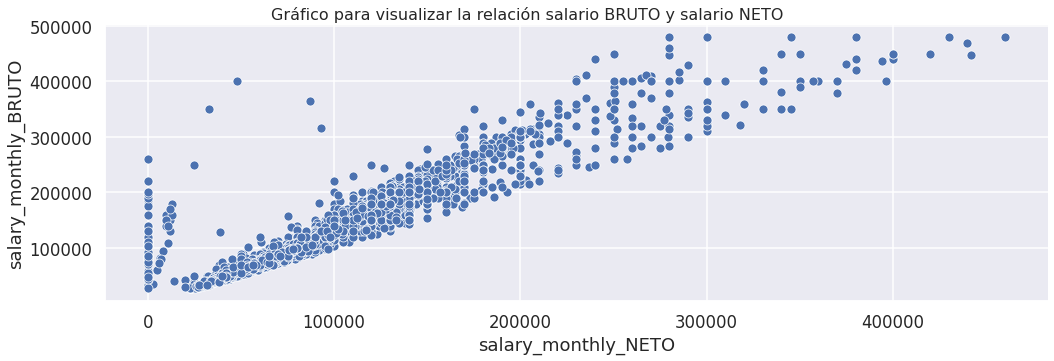

In [ ]:
plt.figure(figsize=(12, 4))
p = seaborn.pairplot(data=df_lang,
                 y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=3, height=5)
p.fig.suptitle('Gráfico para visualizar la relación salario BRUTO y salario NETO', y=1, fontsize = 16)
plt.show()

**Gráfico BOXPLOT antes y después de la limpieza de valores extremos y erróneos.**

In [ ]:
quantile = df[salary_col].quantile(.98)

Text(0.5, 1.0, 'Boxplot con valores extremos')

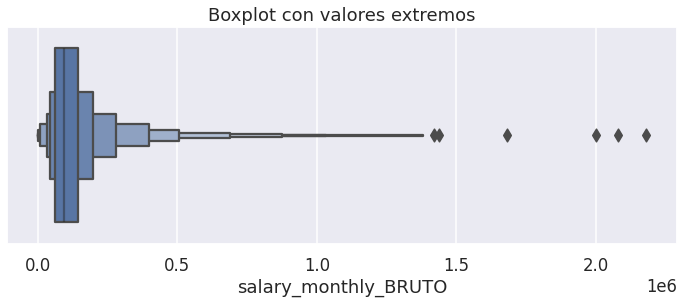

In [ ]:
# Boxplot con valores extremos
plt.figure(figsize=(12, 4))
p = seaborn.boxenplot(x=df[salary_col])
p.set_title('Boxplot con valores extremos')

Text(0.5, 1.0, 'Boxplot sin valores extremos')

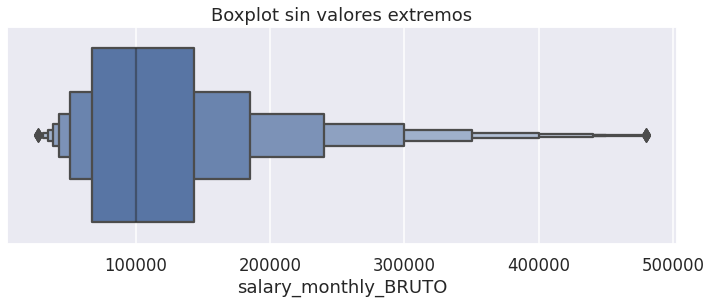

In [ ]:
# Boxplot sin valores extremos
plt.figure(figsize=(12, 4))
max_limit = quantile
p = seaborn.boxenplot(x=df_lang[salary_col])
p.set_title('Boxplot sin valores extremos')

***2. Lista de lenguajes de programación más populares***

*Conteo de frecuencias de los lenguajes de programación*

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [ ]:
df_lang.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

In [ ]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df_lang.loc[:, 'cured_programming_languages'] = df_lang.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 

# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.
df_lang = df_lang.cured_programming_languages\
    .apply(pd.Series).stack()\
    .reset_index(level=-1, drop=True).to_frame()\
    .join(df_lang[relevant_columns])\
    .rename(columns={0: 'programming_language'})
# Horrible programming style! But a lot of data science code can be written with
# as concatenations of functions (pipelines), and there's no elegant way of
# doing that on Python.
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
0,ninguno,Ninguno,53000.0,[ninguno]
1,html,"HTML, Javascript, Python",79000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",79000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",79000.0,"[html, javascript, python]"
2,ninguno,Ninguno,160000.0,[ninguno]


In [ ]:
#Calculamos el salario medio
avg_salary = df_lang[salary_col].mean()
avg_salary

121900.3537501635

In [ ]:
#Calculamos el salario medio por lenguaje de programación
language_salary_mean = df_lang.groupby('programming_language').mean()


In [ ]:
df_lang[salary_col].quantile([.75,.90,.95, .98, .99, .995, .998])

0.750    150000.0
0.900    211000.0
0.950    279000.0
0.980    350000.0
0.990    400000.0
0.995    440000.0
0.998    450000.0
Name: salary_monthly_BRUTO, dtype: float64

En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [ ]:
language_count = df_lang[df_lang['programming_language']!= 'ninguno'].programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count =language_count[language_count.frequency > 9]


***Histograma de frecuencias***

En el mismo visualizamos la distribución de los lenguajes más utilizados

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


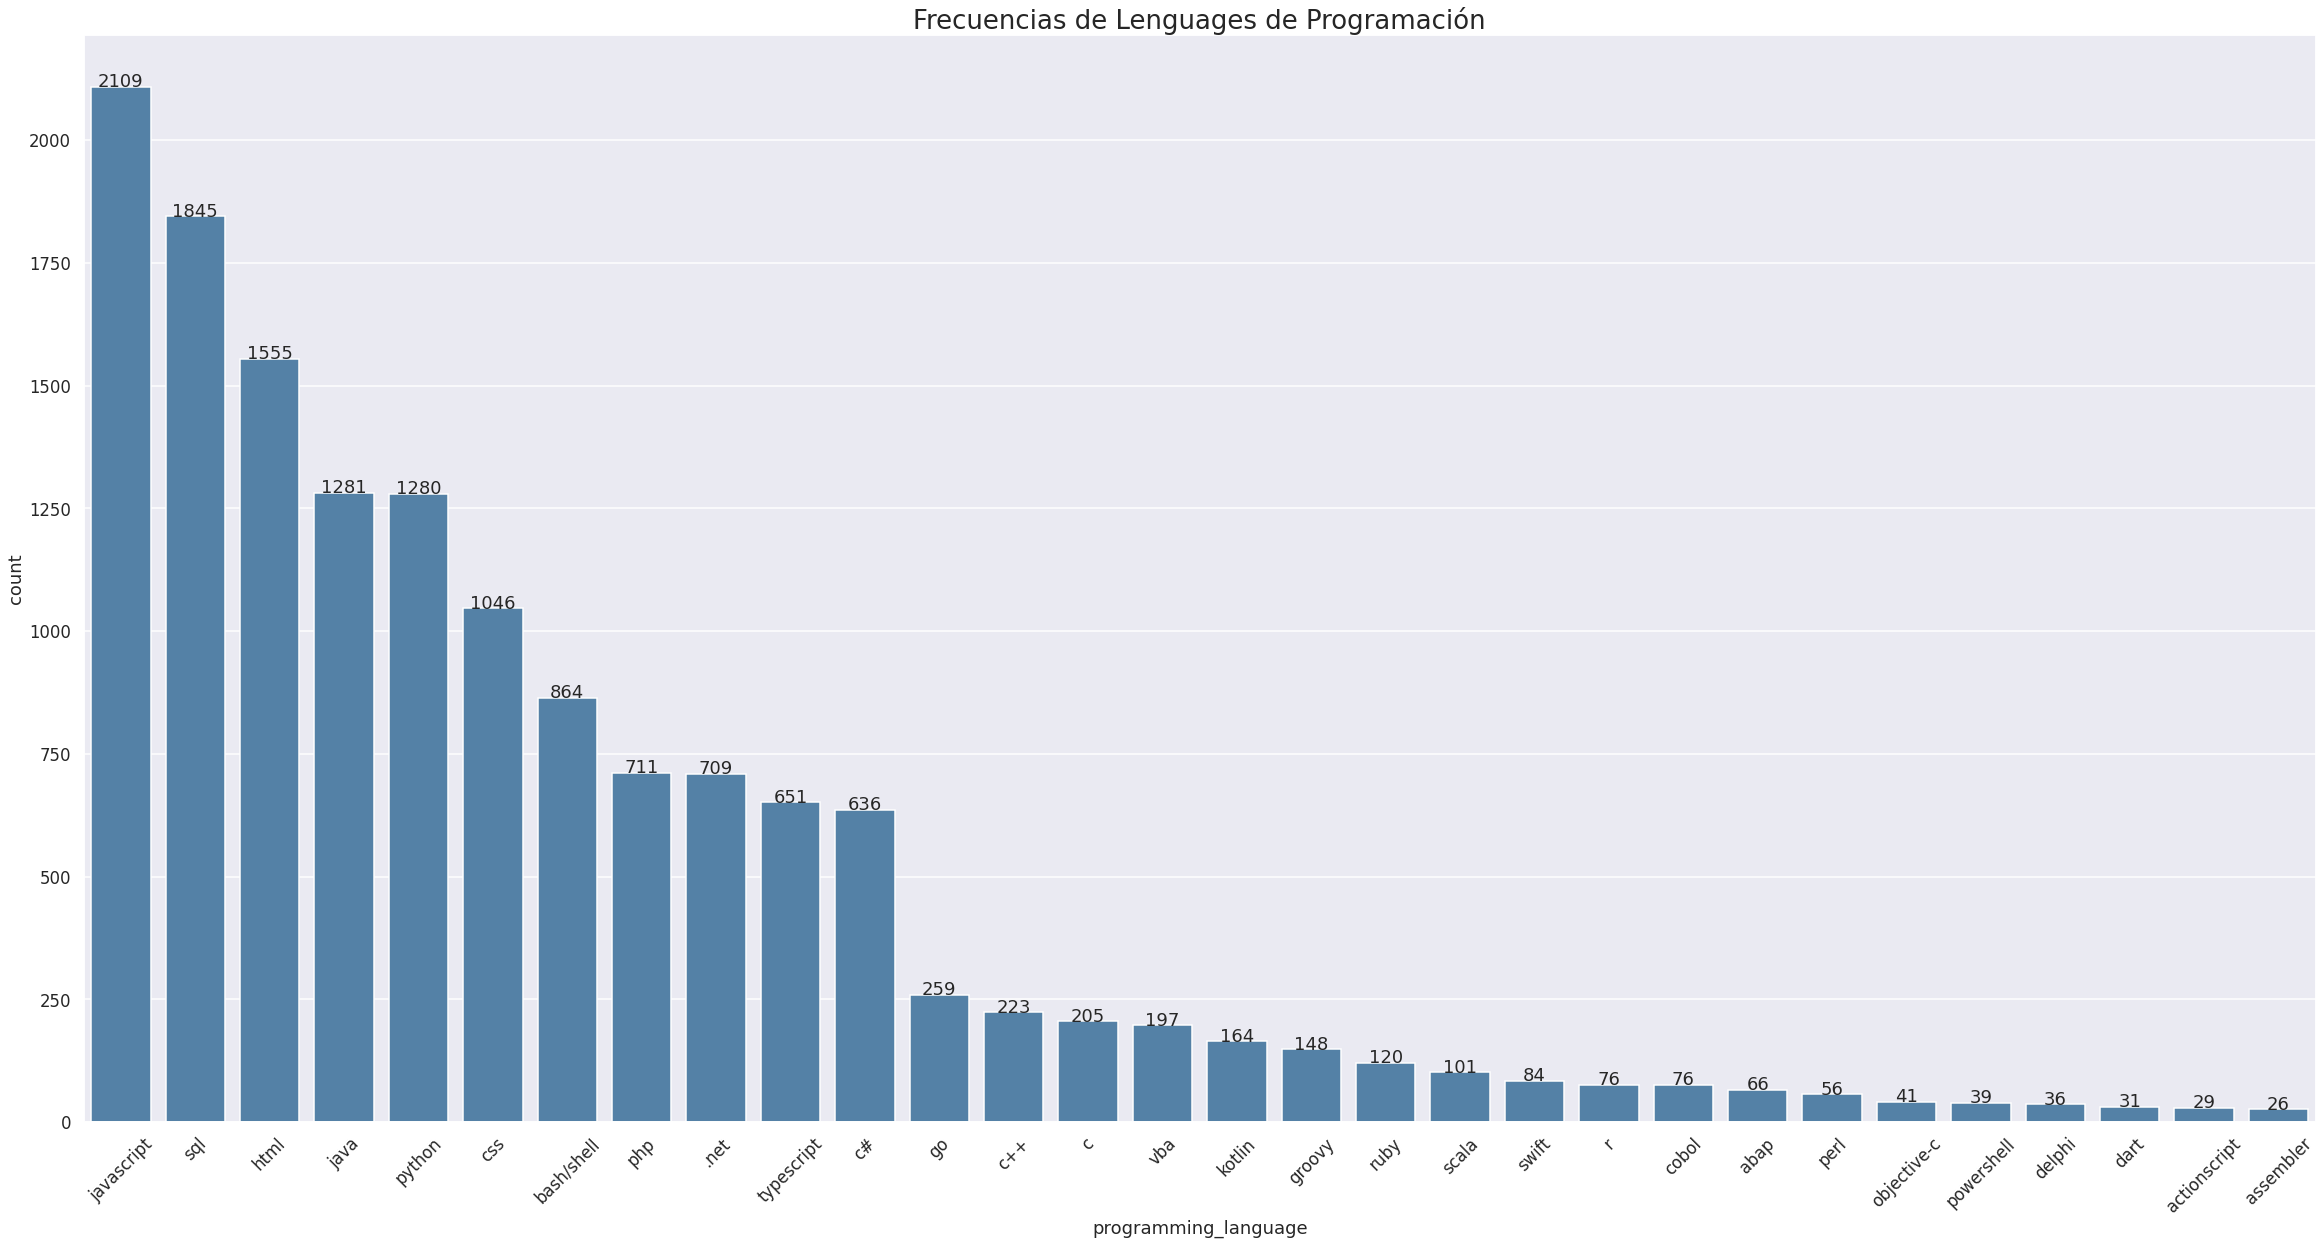

In [ ]:
#fig = plt.figure(figsize=(40,20))
#ax = seaborn.countplot(df_lang[df_lang['programming_language']!= 'ninguno'].programming_language[:], color='steelblue',order = df_lang[df_lang['programming_language']!= 'ninguno'].programming_language.value_counts().index) # gráfico de conteos de la primer columna (profile_gender)
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45,)
#i=0
#for p in ax.patches:
#    height = p.get_height()
#    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
#         df_lang[df_lang['programming_language']!= 'ninguno'].programming_language.value_counts()[i],ha="center")
#    i += 1
#fig.suptitle('Frequencias de Lenguages de Programación', fontsize=20)
#plt.show()

df_lang_clean = df_lang['programming_language']!= 'ninguno'
##
fig = plt.figure(figsize=(40,20))
ax = seaborn.countplot(df_lang[df_lang_clean].programming_language[:], color='steelblue',order = df_lang[df_lang_clean].programming_language.value_counts()[:30].index) # gráfico de conteos de la primer columna (profile_gender)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,)
i=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.1,
         df_lang[df_lang_clean].programming_language.value_counts()[i],ha="center")
    i += 1
ax.set_title('Frecuencias de Lenguages de Programación', fontsize=26)
plt.show()

Verificando la distribución de frecuencias definimos tomar el corte donde las mismas pasan de 56 a 41. Es decir nos quedamos con aquellos lenguajes cuya frecuencia superan los 50 conteos

In [ ]:
# Creamos una lista de columnas de con los lenguajes más utilizados
interesting_languages = language_count[language_count['frequency']>=50]['language'].tolist()


In [ ]:
len(interesting_languages)

24

### Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

In [ ]:

filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]
filtered_df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
1,html,"HTML, Javascript, Python",79000.0,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",79000.0,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",79000.0,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",130000.0,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",130000.0,"[bash/shell, c, css, html, java, javascript, p..."


In [ ]:
filtered_df_lang = filtered_df_lang[["programming_language", "salary_monthly_BRUTO"]]

In [ ]:
filtered_df_lang[:5]

,programming_language,salary_monthly_BRUTO
1,html,79000.0
1,javascript,79000.0
1,python,79000.0
3,bash/shell,130000.0
3,c,130000.0


Ahora ordenamos los lenguajes de programación más utilizados según su mediana y visualizamos mediante un boxplot. 
Elegimos este tipo de gráfico porque podemos comparar quartiles y medidas centrales (en este caso la mediana), en una sola vista.

In [ ]:
filtered_df_lang.groupby("programming_language").median().sort_values('salary_monthly_BRUTO')

,salary_monthly_BRUTO
programming_language,
vba,90000.0
css,91650.0
html,92000.0
c#,95000.0
php,95300.0
abap,98000.0
c++,98868.0
.net,98990.0
sql,99900.0


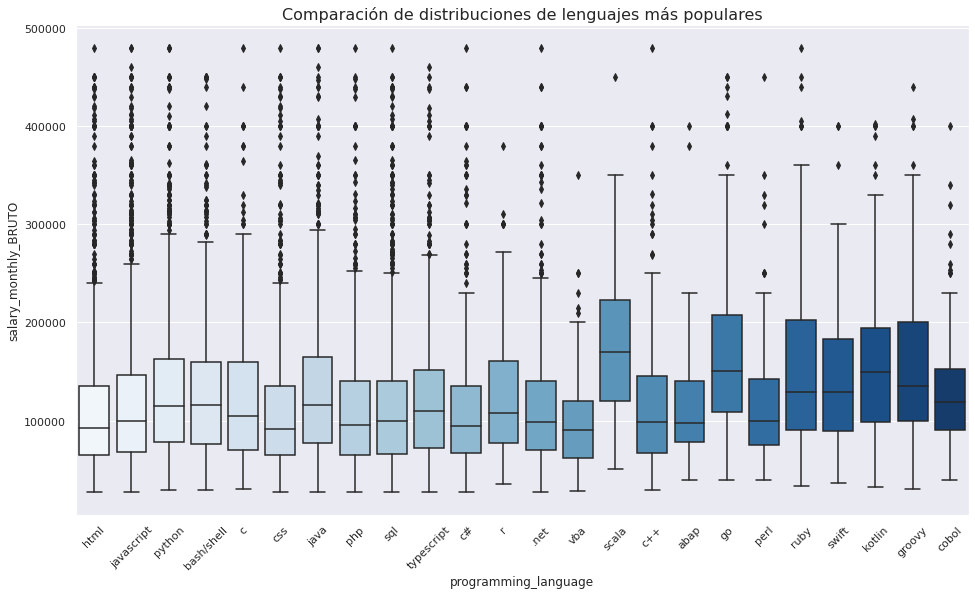

In [ ]:
plt.figure(figsize=(16, 9))
#seaborn.boxplot(data=filtered_df_lang, x='programming_language', y=salary_col,
#                color='orangered').set(title='Comparación de distribuciones de lenguajes más populares')
seaborn.set(style="darkgrid")
seaborn.boxplot(data=filtered_df_lang, x='programming_language', y=salary_col,
                palette="Blues").set_title("Comparación de distribuciones de lenguajes más populares", fontsize = 16)
plt.xticks(rotation=45)
plt.show()


Observando el grafico anterior, nos llamo la atención que 9 de los 10 lenguajes comparten un mismo valor máximo.

Corroboramos a continuación que en nuestro dataframe hay 16 lenguajes asociados al mismo salario máximo de $ 480.000.
Podría deberse a un único registro a asociado varios lenguajes de programación.

In [ ]:
filtered_df_lang[filtered_df_lang[salary_col] == filtered_df_lang[salary_col].max()]

,programming_language,salary_monthly_BRUTO
60,c,480000.0
60,c++,480000.0
60,java,480000.0
60,python,480000.0
303,.net,480000.0
303,c#,480000.0
783,python,480000.0
3421,css,480000.0
3421,html,480000.0
3421,javascript,480000.0


In [ ]:
len(filtered_df_lang[filtered_df_lang[salary_col] == filtered_df_lang[salary_col].max()])

16

Como validación adicional, aplicamos el mismo código pero sobre el dataframe original (que contiene todos los lenguajes, no solo los más populares), ahora tenemos un total de 22 lenguajes. Una diferencia de solo 6.


In [ ]:
df_lang[df_lang[salary_col] >= df_lang[salary_col].max()] 

,programming_language,tools_programming_languages,salary_monthly_BRUTO,cured_programming_languages
60,c,"C, C++, Java, Python",480000.0,"[c, c++, java, python]"
60,c++,"C, C++, Java, Python",480000.0,"[c, c++, java, python]"
60,java,"C, C++, Java, Python",480000.0,"[c, c++, java, python]"
60,python,"C, C++, Java, Python",480000.0,"[c, c++, java, python]"
303,.net,".NET, C#",480000.0,"[.net, c#]"
303,c#,".NET, C#",480000.0,"[.net, c#]"
783,python,Python,480000.0,[python]
3421,css,"CSS, HTML, Javascript, SQL",480000.0,"[css, html, javascript, sql]"
3421,html,"CSS, HTML, Javascript, SQL",480000.0,"[css, html, javascript, sql]"
3421,javascript,"CSS, HTML, Javascript, SQL",480000.0,"[css, html, javascript, sql]"


# **Entonces, ¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Podemos ver que dentro de los lenguajes más populares, el que sobresale como mejor pago es 'scala' con un salario bruto cuya mediana es de aproximadamente $ 170.000 . 

Le siguen en importancia 'go' y 'kotlin' con un salario bruto cuya mediana es  de aproximadamente $ 150.000.

Con conocimiento de dominio sabemos que si bien en nuestro país no son muy utilizados, forman parte de los lenguajes mejores pagos sobre todo en Europa y Estados Unidos. Y hoy por hoy muchos de los programadores que residen en nuestro país trabajan para empresas del exterior.

# Ejercicio 2 - Densidades y varias variables

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos?

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa

**Variables categóricas**


1.   Principal Actividad de la compañía
2.   Tipo de contratación laboral



In [ ]:
df['company_main_activity'].unique()

array(['Servicios / Consultoría de Software / Digital',
       'Otras industrias', 'Producto basado en Software'], dtype=object)

In [ ]:
df['work_contract_type'].unique()

array(['Full-Time', 'Freelance', 'Part-Time',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Remoto (empresa de otro país)'], dtype=object)

**Variables numéricas**


1.   Salario Bruto
2.   Descuentos (creada a partir de la diferencia entre Salario Bruto y Neto)
3.   Años de experiencia



In [ ]:
df['salary_monthly_DESCUENTOS']=df.salary_monthly_BRUTO-df.salary_monthly_NETO

In [ ]:
df_e2 = df[['salary_monthly_BRUTO', 'salary_monthly_DESCUENTOS', 'profile_years_experience', 'company_main_activity', 'work_contract_type','salary_monthly_NETO','profile_studies_level']]
df_e2[:5]

,salary_monthly_BRUTO,salary_monthly_DESCUENTOS,profile_years_experience,company_main_activity,work_contract_type,salary_monthly_NETO,profile_studies_level
0,53000.0,10000.0,3.0,Servicios / Consultoría de Software / Digital,Full-Time,43000.0,Universitario
1,79000.0,16000.0,5.0,Otras industrias,Full-Time,63000.0,Universitario
2,160000.0,33000.0,2.0,Otras industrias,Full-Time,127000.0,Secundario
3,130000.0,28000.0,15.0,Otras industrias,Full-Time,102000.0,Posgrado
4,140000.0,34000.0,9.0,Servicios / Consultoría de Software / Digital,Full-Time,106000.0,Universitario


In [ ]:
df['salary_monthly_DESCUENTOS'].isna().sum()

212

**Procedemos a la limpieza de datos**


1.   Percentiles para valores extremos

         *   Para la variable Salario Bruto (Los mismos que para el ejercicio 1)







In [ ]:
def clean_outliers_p05_p98(dataset, column_name):
    interesting_col = dataset[column_name]
    return dataset[(interesting_col <= (interesting_col.quantile(.98)))  & (interesting_col >= (interesting_col.quantile(.05)))]

In [ ]:
df_e2 =  clean_outliers_p05_p98(df_e2, 'salary_monthly_BRUTO')
len(df_e2)

5672

         *   Para la variable Salario Neto, al ver los valores de los percentiles elegimos los k 0,015 y k 0,99 
         (Los mismos se corresponden con valores acordes a los que representan los percentiles mínimos y máximos de la variable Salario Bruto,
         dejando afuera menos del 2% de los datos)

In [ ]:
# Percentiles más bajos para filtrar valores extremos izquierdos
df_e2['salary_monthly_NETO'].quantile([.01, .015, .02, .03,])

0.010    10000.0
0.015    23249.0
0.020    25649.0
0.030    30000.0
Name: salary_monthly_NETO, dtype: float64

In [ ]:
# Percentiles más altos para filtrar valores extremos derechos
df_e2['salary_monthly_NETO'].quantile([.90,.91,0.93,0.99])

0.90    146000.0
0.91    150000.0
0.93    170000.0
0.99    330357.0
Name: salary_monthly_NETO, dtype: float64

Redefinimos el nuevo dataframe considerando los percentiles mencionados

In [ ]:
def clean_outliers_p015_p99(dataset, column_name):
    interesting_col = dataset[column_name]
    return dataset[(interesting_col <= (interesting_col.quantile(.99)))  & (interesting_col >= (interesting_col.quantile(.015)))]

In [ ]:
df_e2 = clean_outliers_p015_p99(df_e2,'salary_monthly_NETO')
len(df_e2)

5346

2.   Limpieza de registros con descuentos negativos: No puede existir un sueldo neto mayor al bruto, esto indica un claro error que afecta cualquier análisis que se realice con esta variable.


In [ ]:
# Cantidad de descuentos negativos
len(df[df['salary_monthly_DESCUENTOS'] < 0])

156

In [ ]:
#Limpio valores donde el salario NETO es mayor al BRUTO
df_e2 = df_e2[(df_e2['salary_monthly_NETO']<=df_e2['salary_monthly_BRUTO'])]

In [ ]:
len(df_e2)

5262

In [ ]:
df_e2 =  df_e2[(df_e2['salary_monthly_DESCUENTOS'] >= 0) | (df_e2['salary_monthly_DESCUENTOS'].isna())]
len(df_e2)

5262

Los siguientes códigos fueron incluídos previo a definir el nuevo dataframe, necesarios para avanzar con el ejercicio

In [ ]:
# Dejamos fuera aquellos registros con años de experiencia mayores a 50
df_e2 = df_e2[df_e2['profile_years_experience'] <= 50]

In [ ]:
# A los fines de visibilizar en forma más clara el grágico redefinimos los siguientes nombres de la varibale 'Tipo de Contrato de Trabajo'
df_e2['work_contract_type'].mask(df['work_contract_type'] == 'Remoto (empresa de otro país)', 'Remoto', inplace=True)
df_e2['work_contract_type'].mask(df['work_contract_type'] == 'Tercerizado (trabajo a través de consultora o agencia)', 'Tercerizado', inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


***Redefinición del dataframe***

In [ ]:
df_e2[:10]

,salary_monthly_BRUTO,salary_monthly_DESCUENTOS,profile_years_experience,company_main_activity,work_contract_type,salary_monthly_NETO,profile_studies_level
0,53000.0,10000.0,3.0,Servicios / Consultoría de Software / Digital,Full-Time,43000.0,Universitario
1,79000.0,16000.0,5.0,Otras industrias,Full-Time,63000.0,Universitario
2,160000.0,33000.0,2.0,Otras industrias,Full-Time,127000.0,Secundario
3,130000.0,28000.0,15.0,Otras industrias,Full-Time,102000.0,Posgrado
4,140000.0,34000.0,9.0,Servicios / Consultoría de Software / Digital,Full-Time,106000.0,Universitario
5,54000.0,10000.0,1.0,Producto basado en Software,Full-Time,44000.0,Terciario
6,75000.0,12600.0,1.0,Producto basado en Software,Full-Time,62400.0,Universitario
7,45000.0,7500.0,0.0,Producto basado en Software,Full-Time,37500.0,Terciario
8,105000.0,30000.0,20.0,Otras industrias,Full-Time,75000.0,Universitario
9,47000.0,8000.0,20.0,Otras industrias,Full-Time,39000.0,Universitario


**Relacionamos variables**


1.   Los años de experiencia (numérica) con el tipo de contratación (categórica)



Como primer paso discretizamos en rangos la variable de años de experiencia

In [ ]:
bins = [-1,5,10,15,20,25,100]
names = ['0-5','5-10','10-15','15-20','20-25','+25']

In [ ]:
df_e2['rango_experiencia'] = pd.cut(df['profile_years_experience'],bins,labels=names)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
tabla = pd.crosstab(df_e2.rango_experiencia, df_e2.work_contract_type)
#tabla = tabla[tabla['profile_years_experience'] <= 50]
type(tabla)
tabla

work_contract_type,Freelance,Full-Time,Part-Time,Remoto,Tercerizado
rango_experiencia,,,,,
0-5,37,1870,158,31,92
5-10,34,1196,30,27,39
10-15,28,855,18,22,36
15-20,13,422,7,5,18
20-25,5,184,3,2,3
+25,6,111,7,1,1


Mediante un mapa de calor visualizamos como se relacionan ambas variables

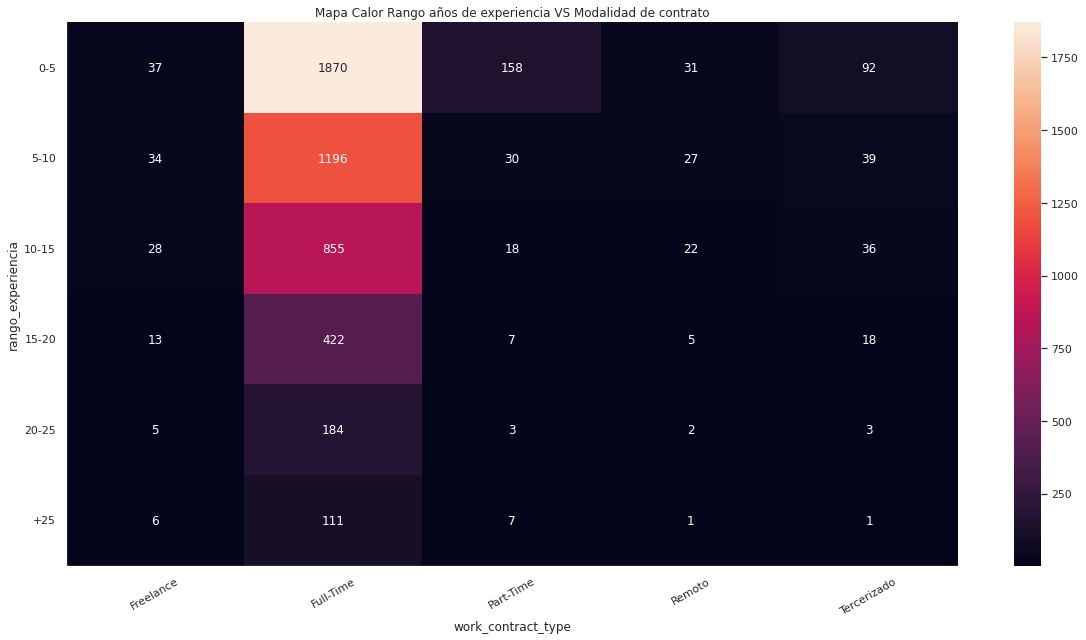

In [ ]:
#fig = plt.figure(figsize=(20,5))
fig = plt.figure(figsize=(20,10))
exp = pd.crosstab(df_e2.rango_experiencia,
                  df_e2.work_contract_type,)
seaborn.heatmap(exp, annot=True, fmt='g').set(title='Mapa Calor Rango años de experiencia VS Modalidad de contrato')
plt.xticks(rotation=30)
plt.yticks(rotation=0)
seaborn.despine()

Vemos que en principio los años de experiencia no se asocian directamente con algún tipo de contratación en particular.

Lo que predomina ampliamente es la contratación full-time, y dentro de este grupo, entre 0 y 15 años de experiencia abarcan casi el 75% de los registros.

2.   El salario bruto (numérica) con la principal actividad de la compañía (categórica)

In [ ]:
#Analizamos la cantidad de respuesta por actividad de la compañía
activity_count = df_e2.company_main_activity.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'activity', 'activity': 'frequency'})
activity_count

,activity,company_main_activity
0,Producto basado en Software,1871
1,Servicios / Consultoría de Software / Digital,1844
2,Otras industrias,1546


Mediante el tipo de gráfico catplot visualizamos la relación entre ambas variables

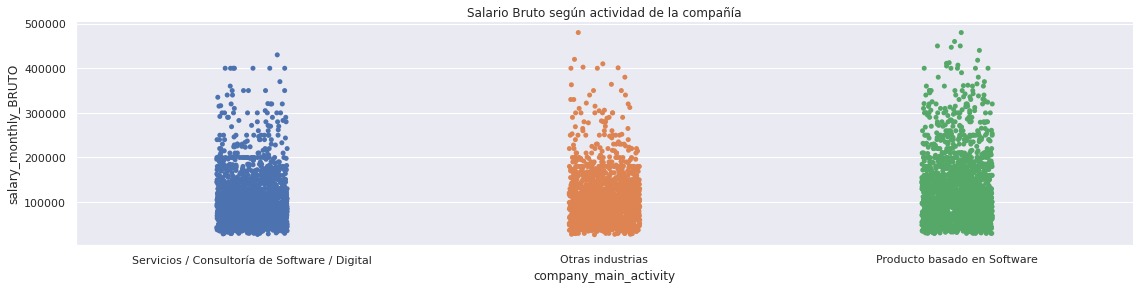

In [ ]:
seaborn.catplot(data=df_e2, y='salary_monthly_BRUTO',  #probar también con profile_age, 'profile_gender'
                x='company_main_activity', height=4, aspect=4).set(title='Salario Bruto según actividad de la compañía')

Podemos ver que la cantidad de respuestas para cada tipo de compañía no difiere demasiado. Y aquellas compañías cuya actividad principal es el producto basado en softawre tiene salarios asociados más altos en comparación con los otros tipos.

3.   El salario bruto (numérica) con los descuentos (numérica). 

    Para la visualización utilizamos un gráfico scatterplot

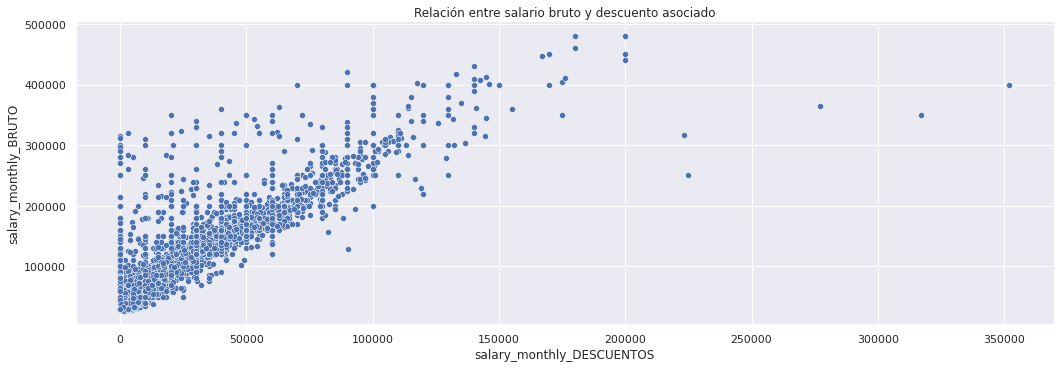

In [ ]:
seaborn.pairplot(data=df_e2, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_DESCUENTOS'],
                 aspect=3, height=5).set(title = "Relación entre salario bruto y descuento asociado")

Algunas conclusiones:


*   En general puede visualizarse una tendencia positiva proporcional. Es decir, a medida que aumenta el salario bruto, también lo hacen los descuentos en la misma proporción.
*   Aquellos puntos que se encuentran sobre el 0 en la variable descuentos, podrían estar identificando aquellos trabajadores que no están en blanco.
*   Aquellos puntos que se encuentran por encima de la 'línea de tendencia' que indican salarios altos con montos de descuentos bajos, podrían deberse a empleos donde solo una parte va en 'blanco' y el resto se paga en 'negro'. O donde la diferencia de sueldo la establece algun bono o algún pago extraordinario no sujeto a aportes y contribuciones.



## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



Visualizamos en un scatterplot ambas variables y podemos ver claramente que existe una correlación positiva entre ambas.

<Figure size 864x288 with 0 Axes>

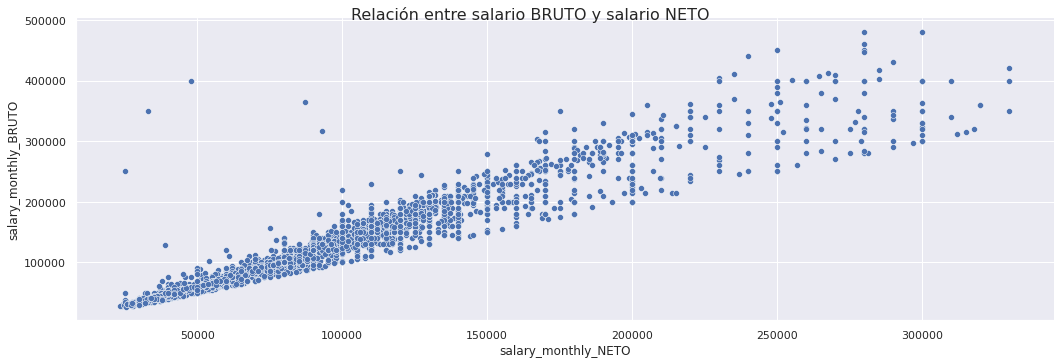

In [ ]:
plt.figure(figsize=(12, 4))
f = seaborn.pairplot(data=df_e2, y_vars=['salary_monthly_BRUTO'],
                 x_vars=['salary_monthly_NETO'],
                 aspect=3, height=5)
f.fig.suptitle('Relación entre salario BRUTO y salario NETO', y=1, fontsize = 16)
plt.show()

A continuación, calculamos la correlación entre las variables mediante la función corrcoef() de la librearía numpy, basado en el coeficiente de correlación de Pearson. 

La correlación entre el salario BRUTO y NETO es positiva casi perfecta. Por lo cual según plantea el enunciado, la columna del salario BRUTO podría no tenerse en cuenta.

In [ ]:
import numpy as np
corr = np.corrcoef(df_e2['salary_monthly_BRUTO'],df_e2['salary_monthly_NETO'])
corr[0,1]

0.9591803303591596

## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [ ]:
# Visualizamos las respuestas por nivel de estudio.
study_level_count = df_e2.profile_studies_level.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'study_level', 'study_level': 'frequency'})
study_level_count

,study_level,profile_studies_level
0,Universitario,3579
1,Terciario,990
2,Secundario,376
3,Posgrado,289
4,Doctorado,23
5,Primario,2
6,Posdoctorado,2


Las dos subpoblaciones más numerosas con las que vamos a trabajar son las de nivel universitario y terciario.

Visualizamos el salario neto para cada subpoblación en un mismo gráfico.

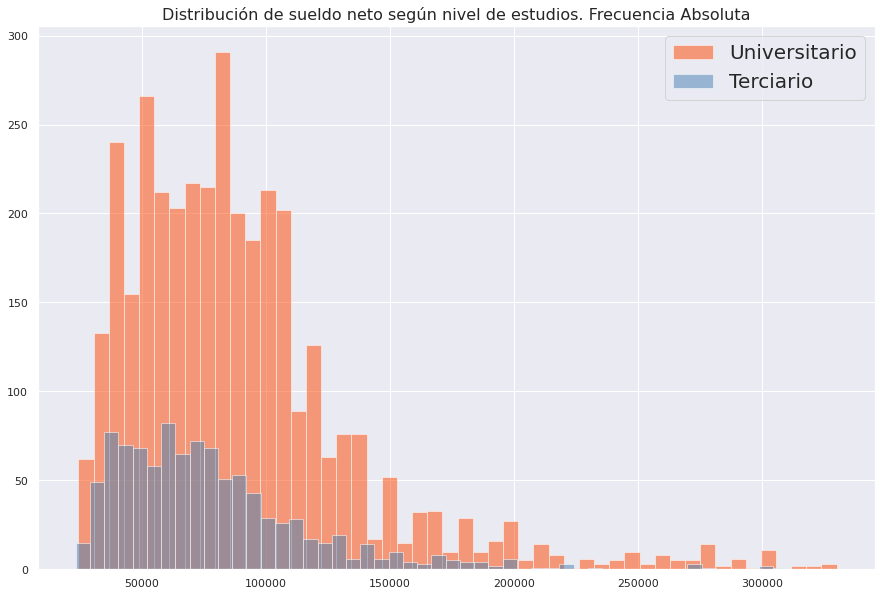

In [ ]:
df_universitario = df_e2[ df_e2['profile_studies_level']=='Universitario']
df_terciario=df_e2[ df_e2['profile_studies_level']=='Terciario']

plt.figure(figsize=(15,10))
plt.hist(df_universitario['salary_monthly_NETO'], color='orangered', bins=50, alpha=0.5, label="Universitario")
plt.hist(df_terciario['salary_monthly_NETO'], color='steelblue', bins=50, alpha=0.5, label="Terciario") #aca importa el orden, cuidado con la superposición
plt.title("Distribución de sueldo neto según nivel de estudios. Frecuencia Absoluta", fontsize = 16)

plt.legend(fontsize=20)
plt.show()

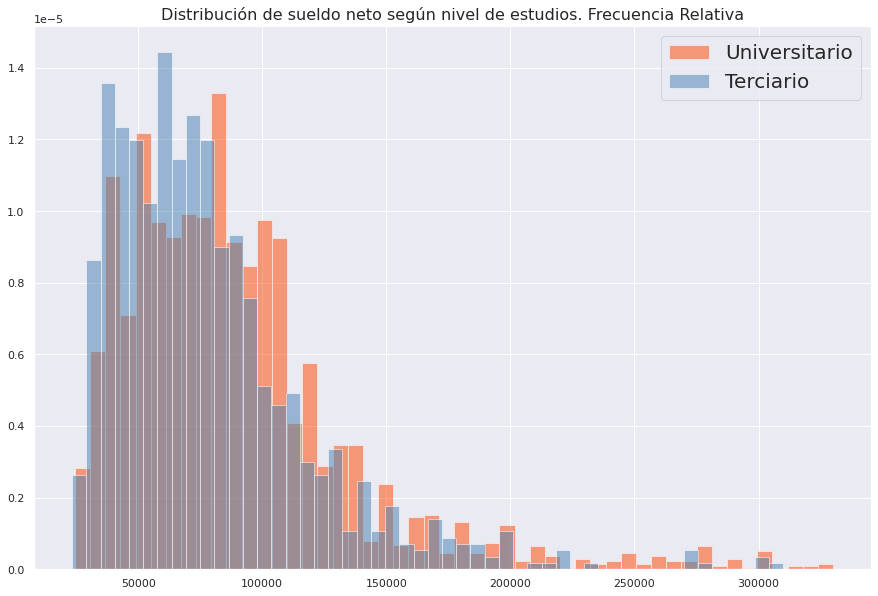

In [ ]:
df_universitario = df_e2[ df_e2['profile_studies_level']=='Universitario']
df_terciario=df_e2[ df_e2['profile_studies_level']=='Terciario']

plt.figure(figsize=(15,10))
plt.hist(df_universitario['salary_monthly_NETO'], color='orangered', bins=50, alpha=0.5, label="Universitario",density=True)
plt.hist(df_terciario['salary_monthly_NETO'], color='steelblue', bins=50, alpha=0.5, label="Terciario",density=True) #aca importa el orden, cuidado con la superposición
plt.title("Distribución de sueldo neto según nivel de estudios. Frecuencia Relativa", fontsize = 16)

plt.legend(fontsize=20)
plt.show()

In [ ]:
# Calculamos las principales medidas para la subpoblación 'Universitarios'
df_universitario['salary_monthly_NETO'].describe().apply("{0:.2f}".format)

count      3579.00
mean      89261.17
std       47140.76
min       24500.00
25%       56470.00
50%       80000.00
75%      107000.00
max      330000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
# Calculamos las principales medidas para la subpoblación 'Terciarios'
df_terciario['salary_monthly_NETO'].describe().apply("{0:.2f}".format)

count       990.00
mean      78145.13
std       40447.23
min       23400.00
25%       50000.00
50%       70000.00
75%       93577.50
max      310000.00
Name: salary_monthly_NETO, dtype: object

In [ ]:
# Calculamos el promedio del salario neto
avg_salary = df_e2['salary_monthly_NETO'].mean()
avg_salary

87635.26345371603

In [ ]:
# Probabilidad de que el salario neto sea mayor a la media. (Probabilidad marginal)
is_above_avg = df_e2.salary_monthly_NETO > avg_salary
p_above_avg = len(df_e2[is_above_avg])/len(df_e2)
p_above_avg

0.4103782550845847

In [ ]:
# Probabilidad de que el nivel de estudio sea terciario. (Probabilidad marginal)
is_ter =  df_e2.profile_studies_level == 'Terciario'
p_ter = len(df_e2[is_ter])/len(df_e2)
p_ter

0.18817715263257936

In [ ]:
# Probabilidad conjunta
p_conj = len(df_e2[is_ter & is_above_avg])/len(df_e2)
p_conj

0.05778369131343851

In [ ]:
# Verificamos la independencia de las variables.
independiente_1 = p_conj == p_ter * p_above_avg
independiente_1

False

In [ ]:
p_conj

0.05778369131343851

In [ ]:
p_ter * p_above_avg

0.07722381154414348

In [ ]:
abs(p_conj - (p_ter * p_above_avg))

0.019440120230704974

In [ ]:
# Hacemos lo propio para la otra subpoblación
# Probabilidad de que el nivel de estudio sea universitario. (Probabilidad marginal)
is_uni =  df_e2.profile_studies_level == 'Universitario'
p_uni = len(df_e2[is_uni])/len(df_e2)
p_uni

0.6802889184565671

In [ ]:
# Probabilidad conjunta
p_conj_uni = len(df_e2[is_uni & is_above_avg])/len(df_e2)
p_conj_uni

0.29233985934233037

In [ ]:
# Verificamos la independencia
independiente = p_conj == p_uni * p_above_avg
independiente

False

In [ ]:
p_conj_uni

0.29233985934233037

In [ ]:
p_uni * p_above_avg

0.27917577930958537

In [ ]:
abs(p_conj_uni - (p_uni * p_above_avg))

0.013164080032744996

Vemos que la diferencia entre ambas probabilidades no parece ser demasiada. Por lo cuál hay una cierta independencia aunque no perfecta.
Por lo tanto, podríamos decir que, el salario neto si bien se ve afectado por el nivel de estudios, no implica un gran cambio el pasar de un nivel a otro.

## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)




*   Variables numéricas: Salario Neto y Años de experiencia
*   Variable categórica: Tipo de contrato de trabajo



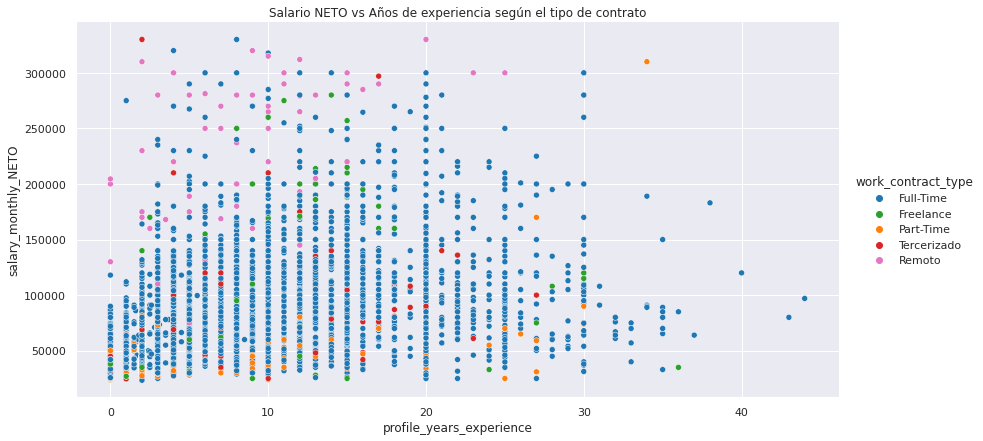

In [ ]:

palette = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red', 'tab:pink']
seaborn.pairplot(data=df_e2, y_vars=['salary_monthly_NETO'],
                 x_vars=['profile_years_experience'], hue = 'work_contract_type',
                 aspect=2, height=6,  palette=palette).set(title='Salario NETO vs Años de experiencia según el tipo de contrato')



Podemos observar:


*   Aquellos cuyo tipo de contratación es remota, cobran salarios netos altos, aunque tengan pocos años de experiencia.
*   Los de tipo de contratación part-time tienen asociados salarios netos bajos, independientemente de los años de experiencia.
*   Los demás tipos de contratación se encuentran más repartidos en el gráfico.
